## Table of Content

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [import libraries](#0)<br>
2. [upLoading and read dataset](#1)<br>
3. [Data Cleaning](#2)<br>
4. [Visualization](#3) <br>
5. [Build model ML](#4) <br>
</div>


# import libraries<a id="0"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# upLoading and read dataset <a id="1"></a>


In [2]:
data = pd.read_csv("/kaggle/input/up-data/diabetes.csv")
##print("Successfully Imported Data!")
##Show data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [5]:
data.shape

(768, 9)

#### Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

##### 1-Pregnancies: Number of times pregnant
##### 2-Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
##### 3-BloodPressure: Diastolic blood pressure (mm Hg)
##### 4-SkinThickness: Triceps skin fold thickness (mm)
##### 5-Insulin: 2-Hour serum insulin (mu U/ml)
##### 6-BMI: Body mass index (weight in kg/(height in m)^2)
##### 7-DiabetesPedigreeFunction: Diabetes pedigree function
##### 8-Age: Age (years)
#### 9-Outcome: Class variable (0 or 1)

# Data Cleaning<a id="2"></a>

## 1-deals with Missing Values 


In [6]:
missing_values = data.isnull().sum()
missing_values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Here from above code we first checked that is there any null values from isnull() function then we are going to take the sum of all those missing values from sum() function and the inference we now get is that there are no missing values but that is actually not a true story as in this particular dataset all the missing values were given the 0 as value which is not good for the authenticity of the dataset.
Hence we will first replace the 0 value to NAN value then start the imputation process.

##  deal with missing(0) values
#### 1-replace zeros with nan
#### 2-Filling null values with mean
(Another option is to try and fill in the missing values)

In [7]:
## Assigning the columns in a variable which have 0 in their values

Zero_columns = ['Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI']

# Replacing 0 with nan

data[Zero_columns] = data[Zero_columns].replace(0,np.nan)

In [8]:
## showing the count of Nans
print(data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [9]:
## Filling null values with mean

data[['Glucose', 'BloodPressure', 'BMI']] = data[['Glucose', 'BloodPressure', 'BMI']].fillna(data[['Glucose', 'BloodPressure', 'BMI']].mean())
data[['SkinThickness', 'Insulin']] = data[['SkinThickness', 'Insulin']].fillna(data[['SkinThickness', 'Insulin']].mean())
     

In [10]:
missing_values = data.isnull().sum()
missing_values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 2- detect and remove outliers

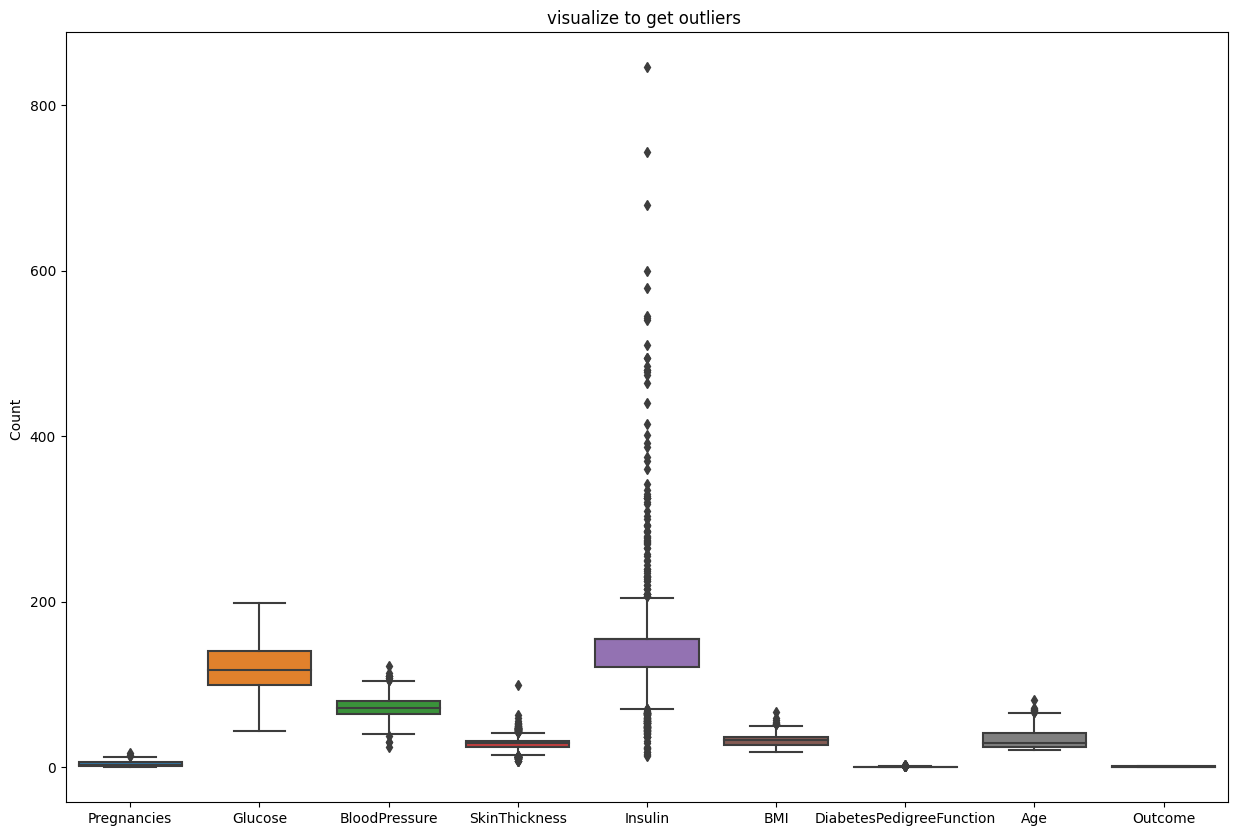

In [11]:
# Box Plot
##data.plot(kind='box', figsize=(15, 9))
plt.figure(figsize = (15,10))

sns.boxplot(data)
plt.title('visualize to get outliers ')
plt.ylabel('Count ')

plt.show()

<Axes: >

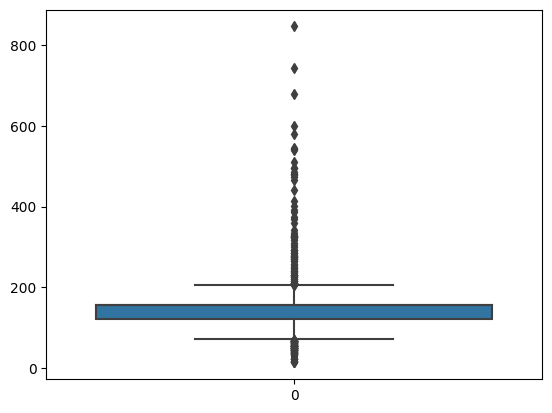

In [12]:
sns.boxplot(data['Insulin'])

In [13]:
#We conduct a stand alone observation review for the Insulin variable

Q1 = data.Insulin.quantile(0.25)
Q3 = data.Insulin.quantile(0.75)
IQR = Q3-Q1
# print(IQR)
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print(lower,upper)

70.42766497461929 206.62055837563452


# Removing the outliers

In [14]:
data.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,121.69,72.41,29.15,155.55,32.46,0.47,33.24,0.35
std,3.37,30.44,12.10,8.79,85.02,6.88,0.33,11.76,0.48
min,0.00,44.00,24.00,7.00,14.00,18.20,0.08,21.00,0.00
25%,1.00,99.75,64.00,25.00,121.50,27.50,0.24,24.00,0.00
50%,3.00,117.00,72.20,29.15,155.55,32.40,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,155.55,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [15]:
def remove_outliers(my_data, column_name):
    mean = my_data[column_name].mean()
    std  = my_data[column_name].std()
 
   # Calculate the lower and upper bounds
    lower_bound = mean - std*2
    upper_bound = mean + std*2
 
    print('Lower Bound :',lower_bound)
    print('Upper Bound :',upper_bound)
 
  # Drop the outliers

    my_data = my_data[(my_data[column_name] >= lower_bound) & (my_data[column_name] <= upper_bound)]
    return my_data

Lower Bound : -14.493992188188685
Upper Bound : 325.5904388886963


<Axes: >

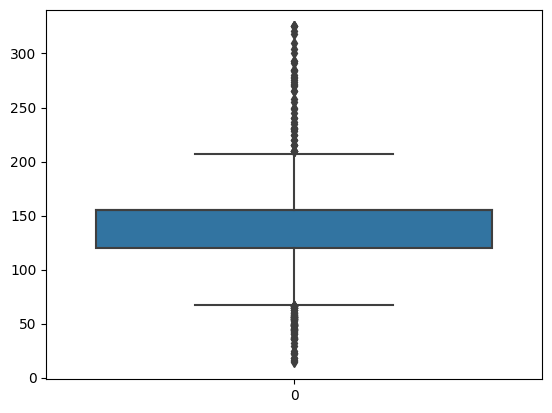

In [16]:
data=remove_outliers(data, 'Insulin')
sns.boxplot(data['Insulin'])

Lower Bound : -2.919144902371523
Upper Bound : 10.64001211104361


<Axes: >

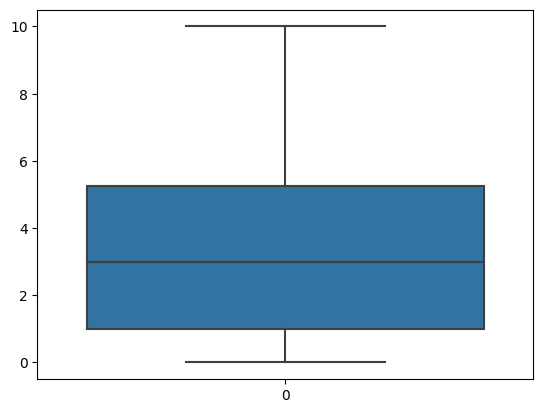

In [17]:
data=remove_outliers(data, 'Pregnancies')
sns.boxplot(data['Pregnancies'])

Lower Bound : 48.10046644132338
Upper Bound : 96.25001957504769


<Axes: >

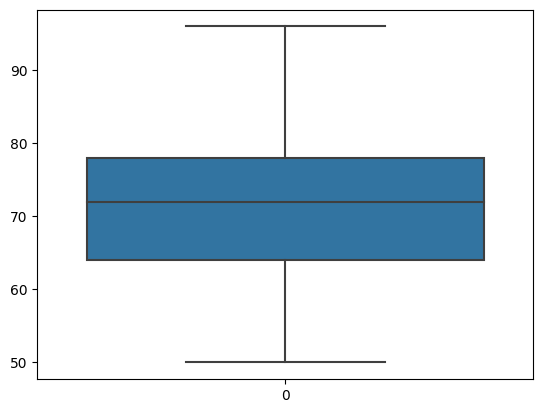

In [18]:
data=remove_outliers(data, 'BloodPressure')
sns.boxplot(data['BloodPressure'])

Lower Bound : 19.047016987052046
Upper Bound : 44.91914997841314


<Axes: >

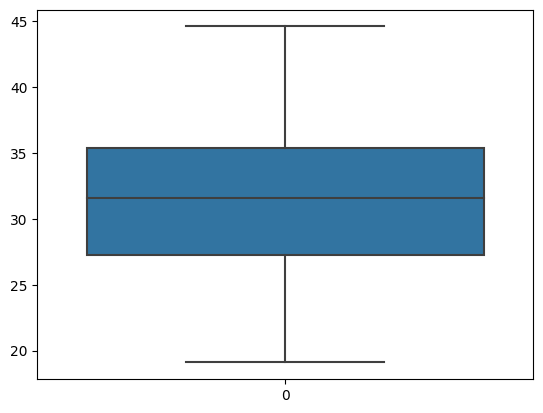

In [19]:
data=remove_outliers(data, 'BMI')
sns.boxplot(data['BMI'])

Lower Bound : 11.798441526793734
Upper Bound : 45.104028698553606


<Axes: >

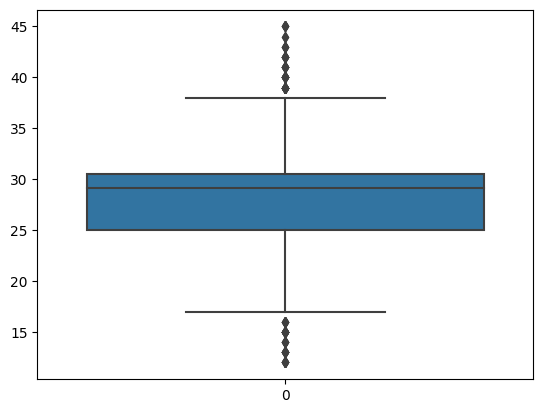

In [20]:
data=remove_outliers(data, 'SkinThickness')
sns.boxplot(data['SkinThickness'])

Lower Bound : -0.15636482964613713
Upper Bound : 1.0649376610700323


<Axes: >

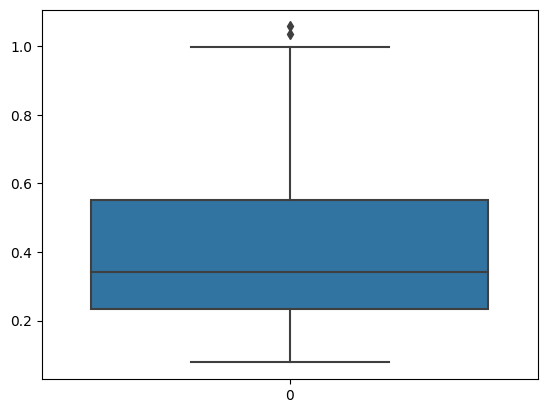

In [21]:
data=remove_outliers(data, 'DiabetesPedigreeFunction')
sns.boxplot(data['DiabetesPedigreeFunction'])

Lower Bound : 9.187469543628197
Upper Bound : 56.31512112994693


<Axes: >

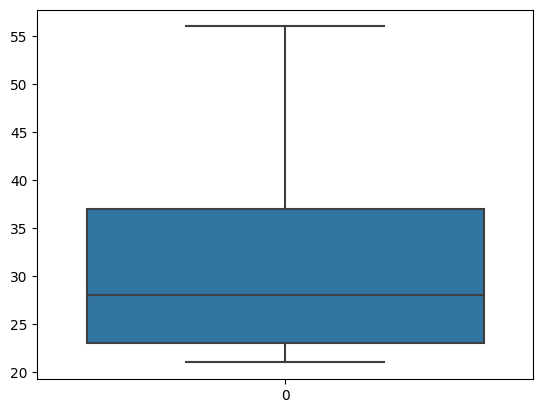

In [22]:
data=remove_outliers(data, 'Age')
sns.boxplot(data['Age'])

Lower Bound : 60.61661406934371
Upper Bound : 175.58503252776137


<Axes: >

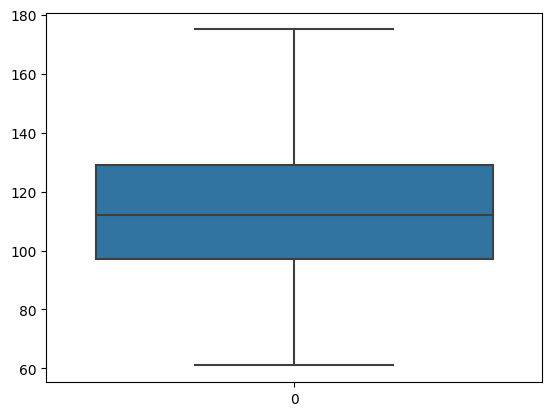

In [23]:
data=remove_outliers(data, 'Glucose')
sns.boxplot(data['Glucose'])

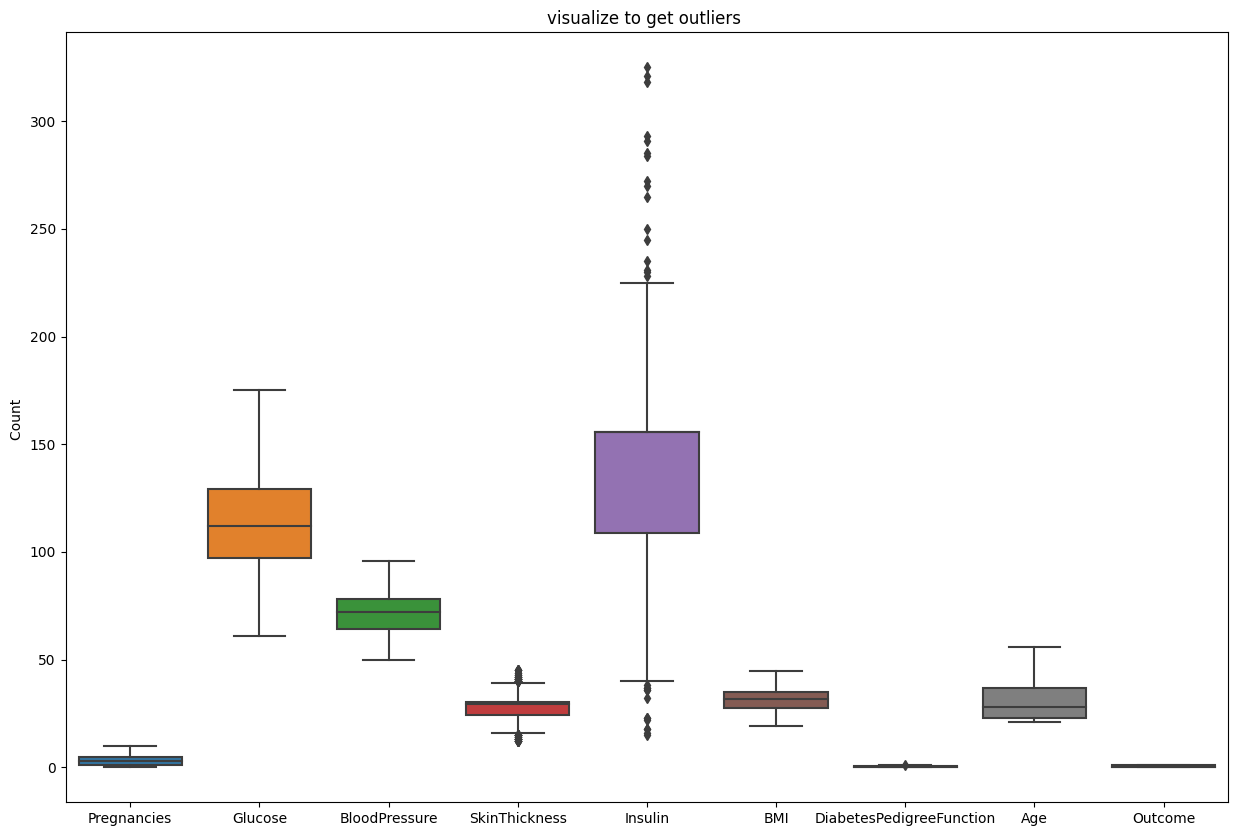

In [24]:
plt.figure(figsize = (15,10))

sns.boxplot(data)
plt.title('visualize to get outliers ')
plt.ylabel('Count ')

plt.show()

# 3- Scaling and Normalization

# Scaling or Standardization

In [25]:

scalar=MinMaxScaler()
data=scalar.fit_transform(data)

<function matplotlib.pyplot.show(close=None, block=None)>

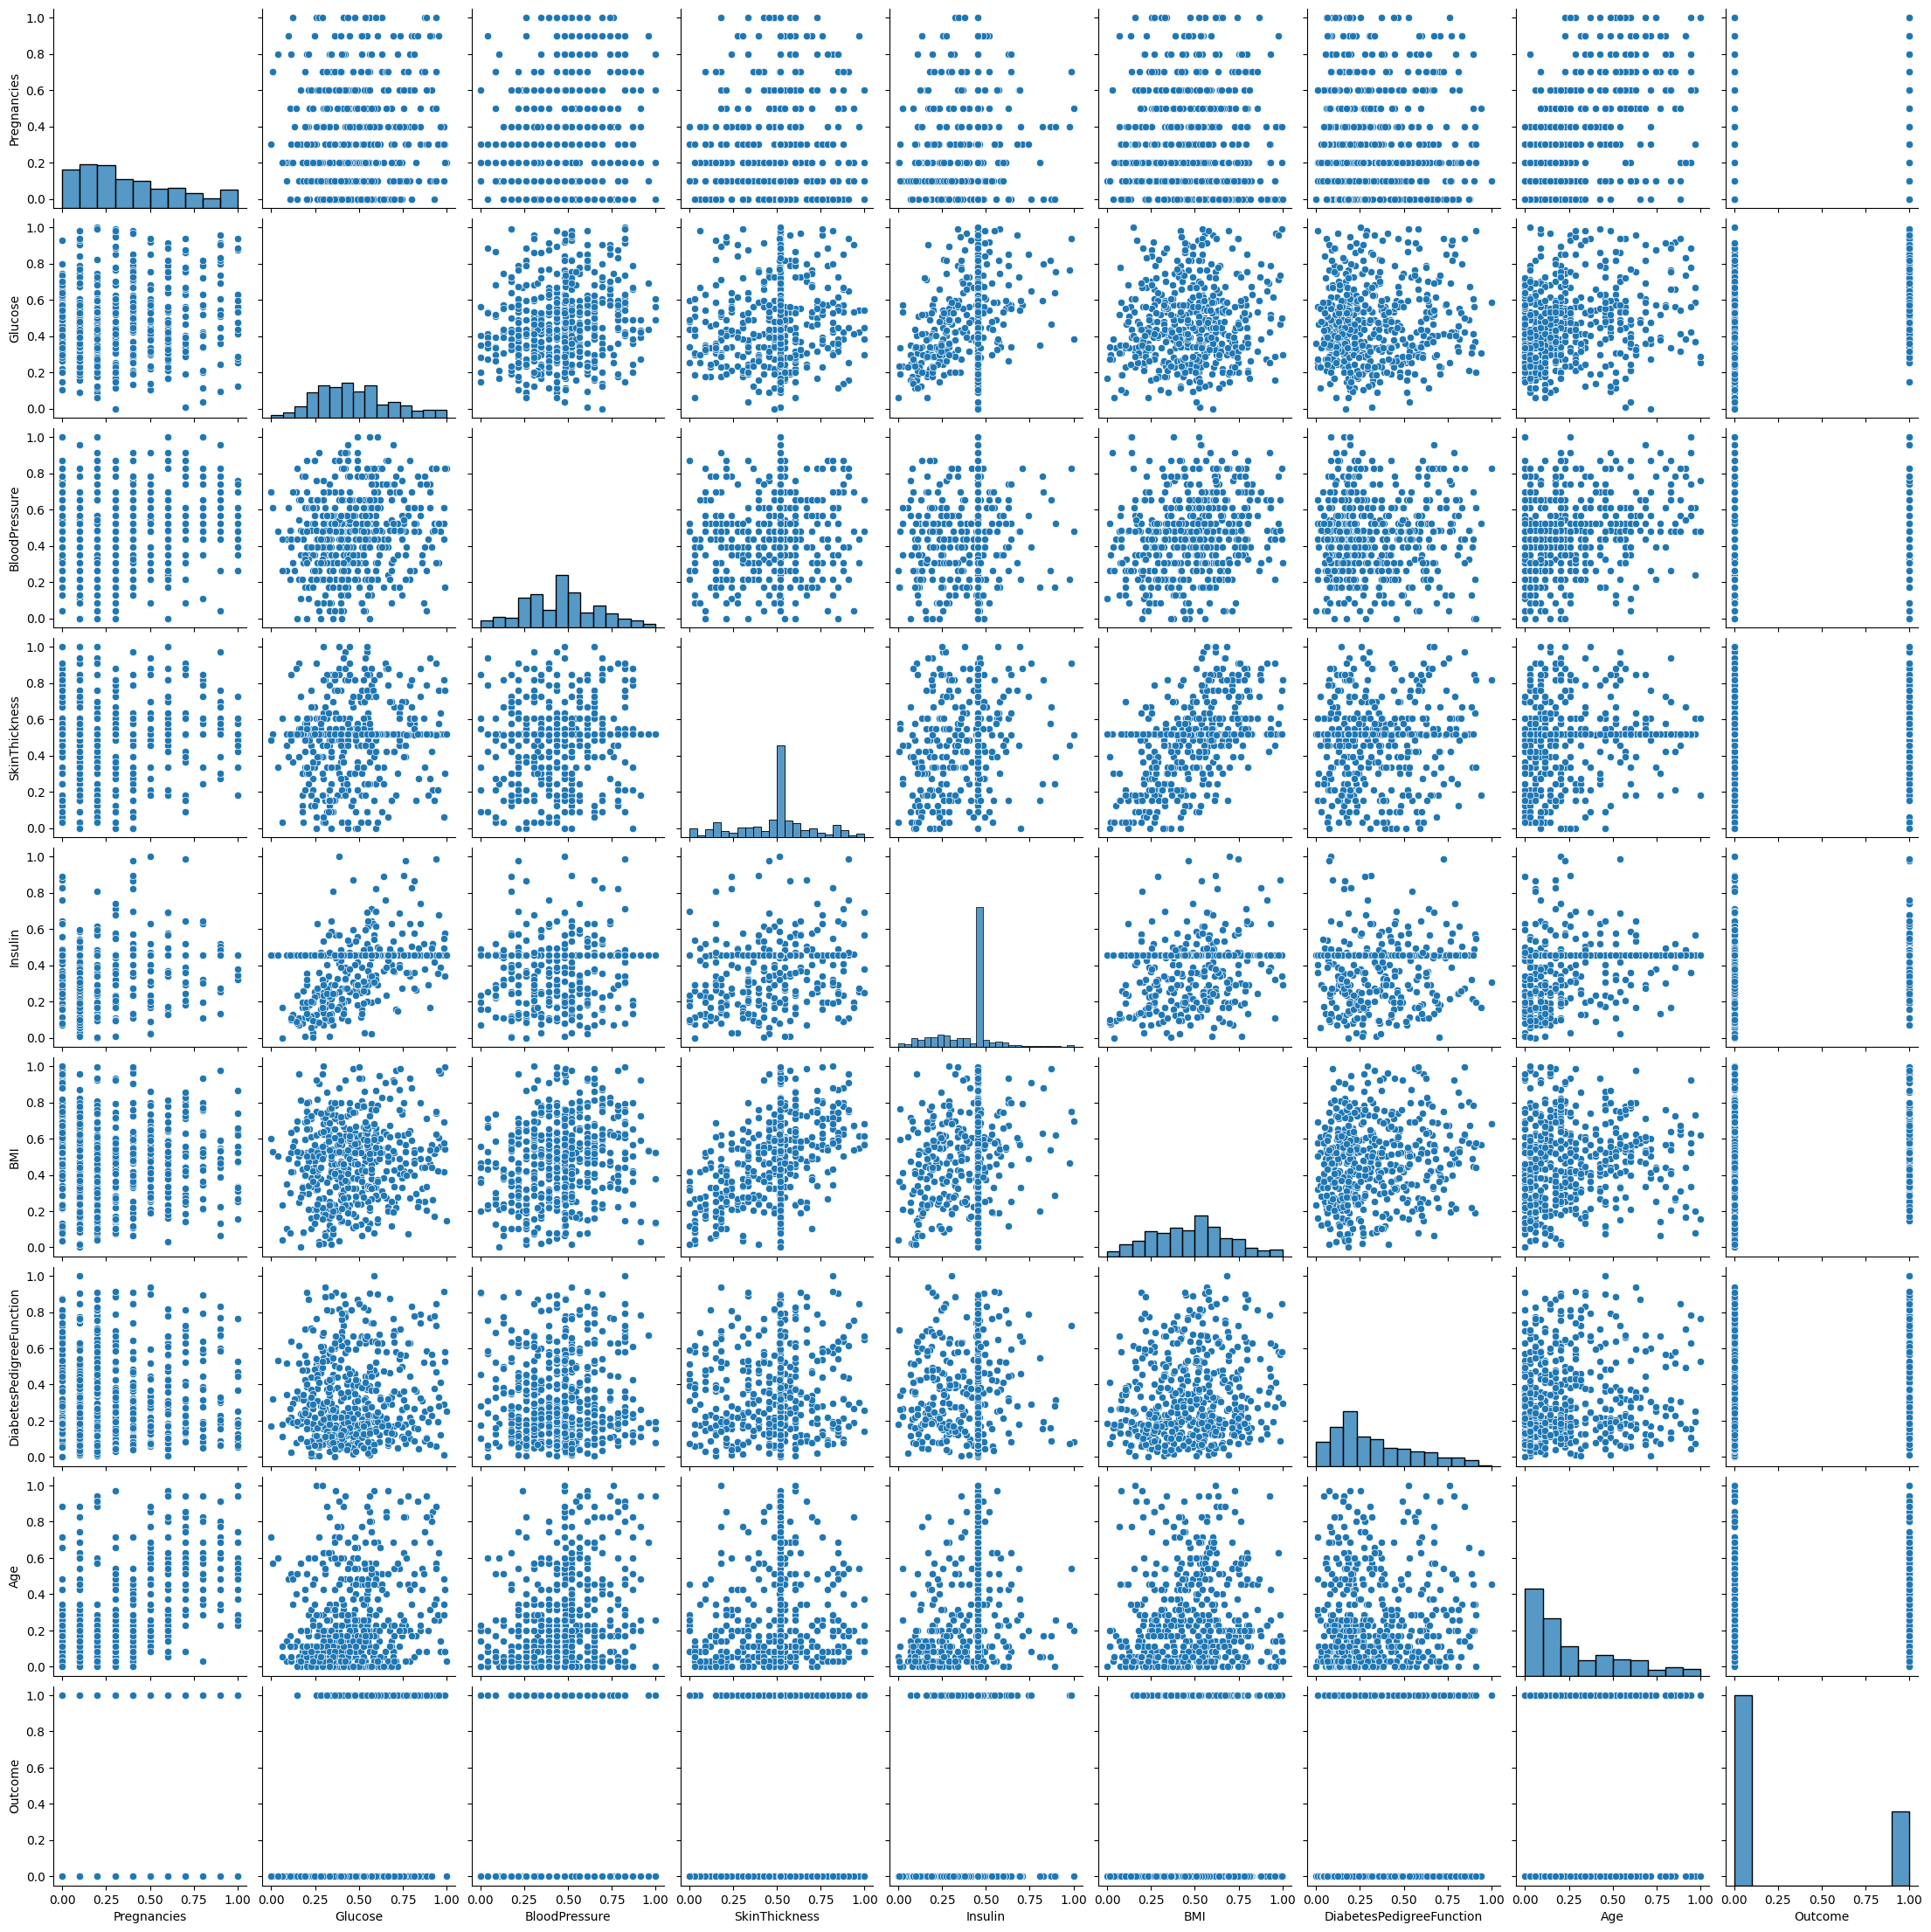

In [26]:
data=pd.DataFrame(data,columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'])
sns.pairplot(data)
plt.show

In [27]:
#another way

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling


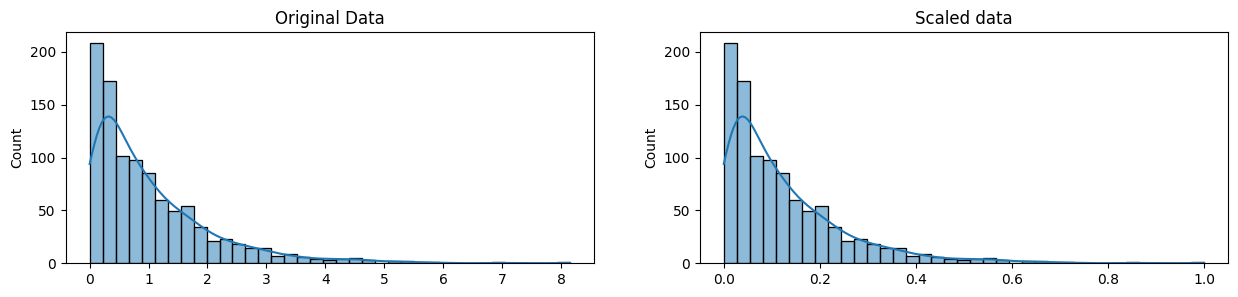

In [28]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

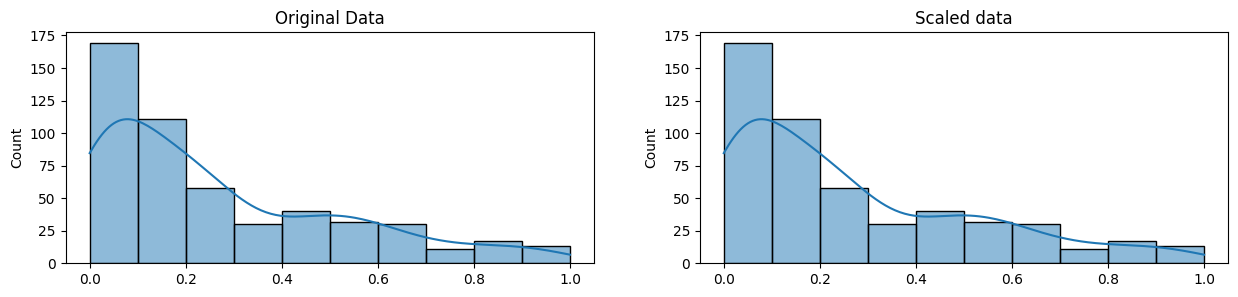

In [29]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = data['Age'].values

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()